Patrick BROCKMANN<br>
Software engineer at LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png"><br><br>
<hr>

### Read the data text file as a pandas dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ggge20271-sup-0004-Data_Table1_Eq_lon_lat_Global_HF_tab.txt", sep='\t')

#### Display just few head lines

In [3]:
df.head()

,Longitude,Latitude,Mean_HF,Median_HF,Total_Erro
0,-179,-89,100,100,41.5
1,-177,-89,100,100,41.5
2,-175,-89,100,100,41.5
3,-173,-89,100,100,41.5
4,-171,-89,100,100,41.5


#### Get some statistics

In [4]:
df['Mean_HF'].describe()

count    16200.000000
mean        84.234717
std         59.882917
min          3.250000
25%         61.650002
50%         67.410004
75%         85.720001
max       1236.780029
Name: Mean_HF, dtype: float64

#### Reshape columns as matrix

In [5]:
Longitude = df['Longitude'].as_matrix().reshape(90, 180)
Latitude = df['Latitude'].as_matrix().reshape(90, 180)
Mean_HF = df['Mean_HF'].as_matrix().reshape(90, 180)
Median_HF = df['Median_HF'].as_matrix().reshape(90, 180)
Total_Erro = df['Total_Erro'].as_matrix().reshape(90, 180)

#### Mapping

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid, addcyclic
import numpy as np

%matplotlib inline

Some good references
 * http://basemaptutorial.readthedocs.org/en/latest/index.html
 * http://matplotlib.org/examples/color/colormaps_reference.html
 * http://matplotlib.org/users/colormaps.html

Some nice color maps
'viridis', 'inferno', 'plasma', 'magma', 'hot'

#### Map with continuous color map

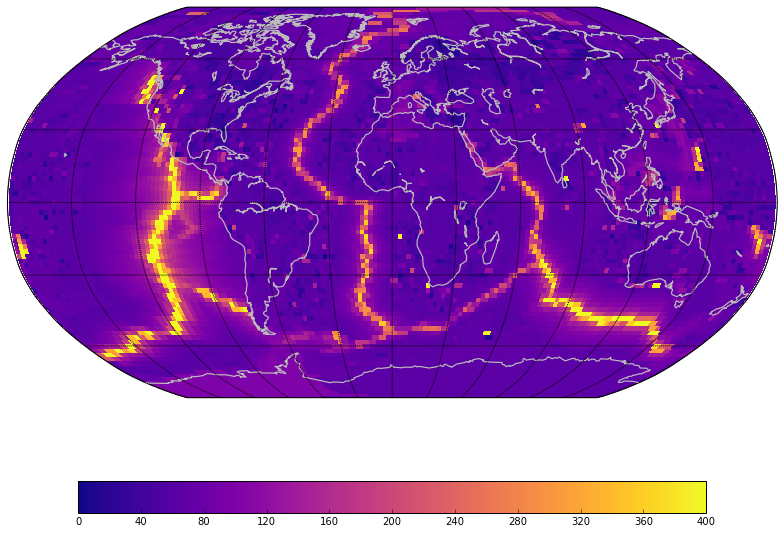

In [7]:
plt.figure(figsize=(15,10))
map = Basemap(projection='robin', lat_0=0, lon_0=0, resolution='c')

map.drawcoastlines(linewidth=1.2, color='#BBBBBB')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

lons, lats = np.meshgrid(Longitude[0,:], Latitude[:,0])

cmap = plt.get_cmap('plasma')
map.pcolor(lons, lats, Mean_HF, cmap=cmap, vmin=0, vmax=400, latlon=True)

plt.colorbar(orientation='horizontal', shrink=0.75)
plt.show()

#### Map with controled levels

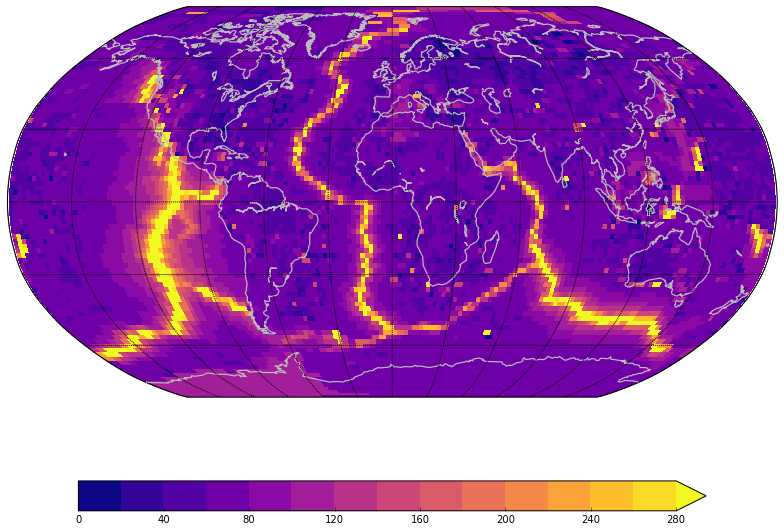

In [8]:
plt.figure(figsize=(15,10))
map = Basemap(projection='robin', lat_0=0, lon_0=0, resolution='c')

map.drawcoastlines(linewidth=1.2, color='#BBBBBB')
map.drawmeridians(np.arange(0, 360, 30))
map.drawparallels(np.arange(-90, 90, 30))

lons, lats = np.meshgrid(Longitude[0,:], Latitude[:,0])

levels = np.arange(0,300,20)
cmap = plt.get_cmap('plasma')
colors = cmap(np.linspace(0, 1, len(levels)))
cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors, extend='max')
map.pcolor(lons, lats, Mean_HF, cmap=cmap, norm=norm, latlon=True)

plt.colorbar(orientation='horizontal', shrink=0.75)
plt.show()

#### Experimental (slippy maps)

In [9]:
import folium
print folium.__version__

from IPython.display import HTML, display

def inline_map(m):
    if isinstance(m, folium.folium.Map):
        m._build_map()
        srcdoc = "data:text/html;base64," + m.HTML.encode('base64')
        embed = HTML('<iframe src="{}" '
                 'style="width: {}px; height: {}px; '
                 'border: none"></iframe>'.format(srcdoc, m.width, m.height))
    else:
        raise ValueError('{!r} is not a folium Map instance.')
    return embed

0.1.6


In [14]:
map = folium.Map(width=600, height=400, zoom_start=1)

#=====================================
url="http://webportals.ipsl.jussieu.fr/thredds/wms/ATLAS/heat_flow.nc?"
parameters= 'LAYERS=HF_MEAN' + '&' + \
            'ELEVATION=0' + '&' + \
            'STYLES=boxfill%2Fplasma' + '&' + \
            'COLORSCALERANGE=0,300' + '&' + \
            'NUMCOLORBANDS=20' + '&' + \
            'ABOVEMAXCOLOR=extend' + '&' + \
            'BELOWMINCOLOR=extend'
map.add_wms_layer(wms_name="Heat_flow",
                  wms_url=url + parameters,
                  wms_format="image/png")

#=====================================
url="http://www.globalcarbonatlas.org:8080/geoserver/GCA/wms?"
map.add_wms_layer(wms_name="Continents_frontiers",
                  wms_url=url,
                  wms_layers="GCA:GCA_frontiersCountryAndRegions",
                  wms_format="image/png")

#=====================================
map.add_layers_to_map()

inline_map(map)